In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Read in the Churn data set
churn = pd.read_csv("churn.txt")
churn.shape

(3333, 21)

In [3]:
# Show the first ten records
churn.head(10)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [4]:
churn.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [6]:
churn["Churn?"]

0       False.
1       False.
2       False.
3       False.
4       False.
         ...  
3328    False.
3329    False.
3330    False.
3331    False.
3332    False.
Name: Churn?, Length: 3333, dtype: object

In [7]:
# Summarize the Churn variable 
churn["Churn?"].value_counts()

False.    2850
True.      483
Name: Churn?, dtype: int64

In [8]:
# Calculate proportion of churners
churn["Churn?"].value_counts(normalize = True) * 100

False.    85.508551
True.     14.491449
Name: Churn?, dtype: float64

/Users/jiananchen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Churning Customers')

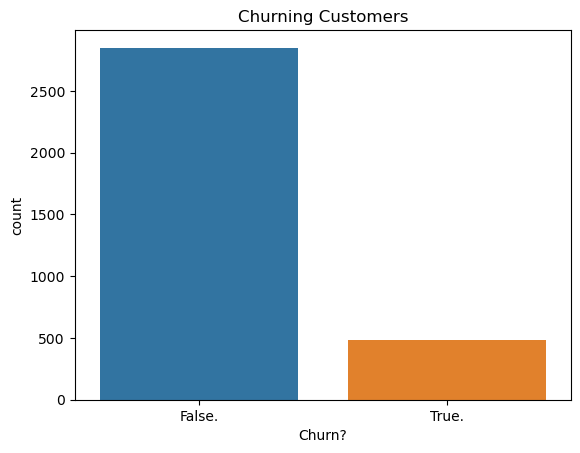

In [9]:
# Bar chart of variable Churn
ax = sns.countplot(churn["Churn?"])
ax.set_title("Churning Customers")

<AxesSubplot:title={'center':'Churning Customers'}>

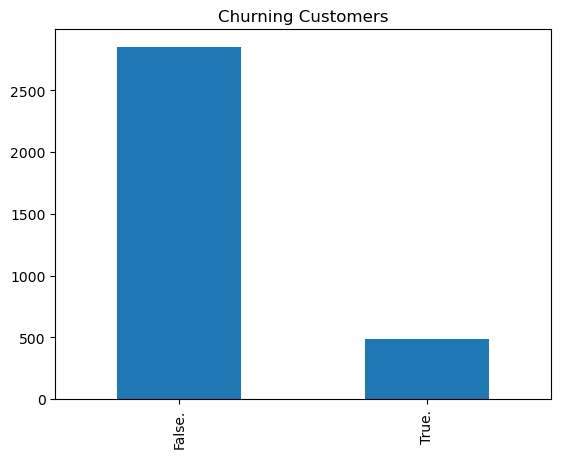

In [10]:
# in comparison: matplotlib
churn["Churn?"].value_counts().plot(kind='bar', title= "Churning Customers")

In [11]:
# do not add total margins for visualization
churn_crosstab = pd.crosstab(churn["Churn?"], churn["Int'l Plan"], margins=False)

In [12]:
pd.crosstab(churn["Churn?"], churn["Int'l Plan"], margins=True)

Int'l Plan,no,yes,All
Churn?,,,
False.,2664,186,2850
True.,346,137,483
All,3010,323,3333


<AxesSubplot:xlabel="Int'l Plan", ylabel='count'>

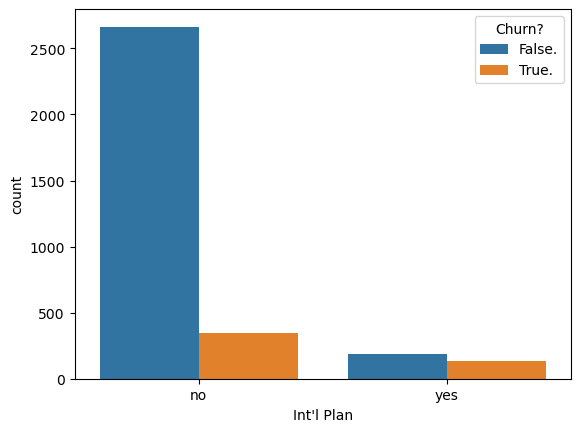

In [13]:
# seaborn does not (yet?) support stacked bar charts natively
sns.countplot(x="Int'l Plan", hue="Churn?", data=churn)

<AxesSubplot:xlabel="Int'l Plan">

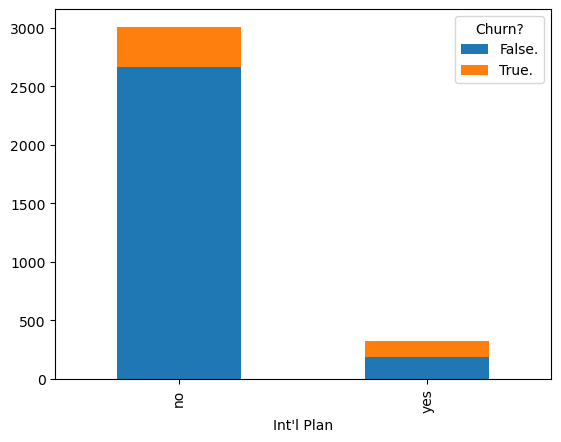

In [14]:
churn_crosstab = churn_crosstab.transpose()
churn_crosstab.plot(kind = 'bar', stacked = True)

In [15]:
churn_crosstab_norm = churn_crosstab.div(churn_crosstab.sum(axis=1), axis=0)
churn_crosstab_norm

Churn?,False.,True.
Int'l Plan,,
no,0.885050,0.114950
yes,0.575851,0.424149


<AxesSubplot:xlabel="Int'l Plan">

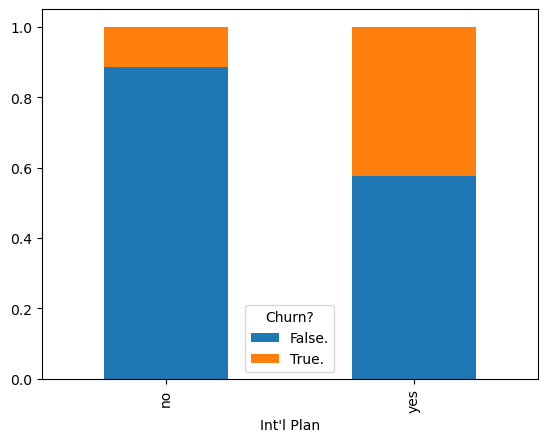

In [16]:
churn_crosstab_norm.plot(kind = 'bar', stacked = True)

array([[<AxesSubplot:title={'center':'Account Length'}>,
        <AxesSubplot:title={'center':'Area Code'}>,
        <AxesSubplot:title={'center':'VMail Message'}>,
        <AxesSubplot:title={'center':'Day Mins'}>],
       [<AxesSubplot:title={'center':'Day Calls'}>,
        <AxesSubplot:title={'center':'Day Charge'}>,
        <AxesSubplot:title={'center':'Eve Mins'}>,
        <AxesSubplot:title={'center':'Eve Calls'}>],
       [<AxesSubplot:title={'center':'Eve Charge'}>,
        <AxesSubplot:title={'center':'Night Mins'}>,
        <AxesSubplot:title={'center':'Night Calls'}>,
        <AxesSubplot:title={'center':'Night Charge'}>],
       [<AxesSubplot:title={'center':'Intl Mins'}>,
        <AxesSubplot:title={'center':'Intl Calls'}>,
        <AxesSubplot:title={'center':'Intl Charge'}>,
        <AxesSubplot:title={'center':'CustServ Calls'}>]], dtype=object)

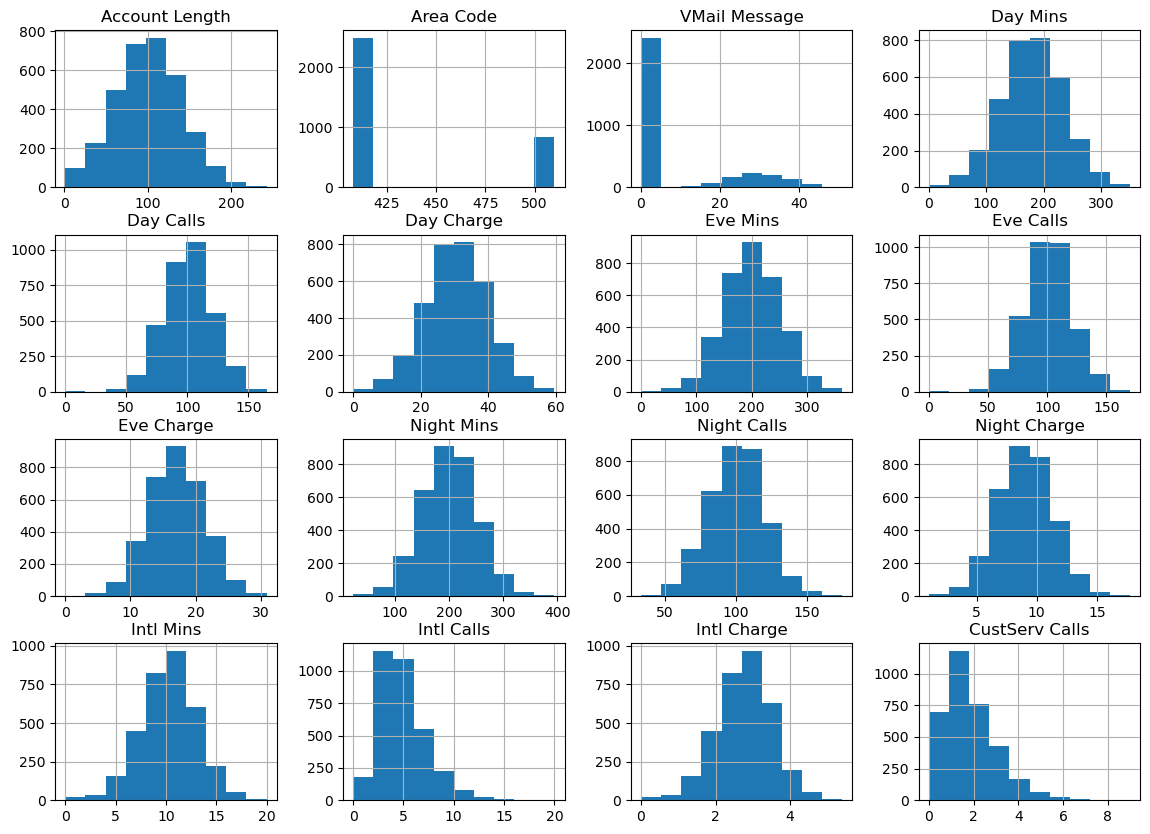

In [17]:
churn.hist(figsize=(14,10))

/Users/jiananchen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CustServ Calls', ylabel='Density'>

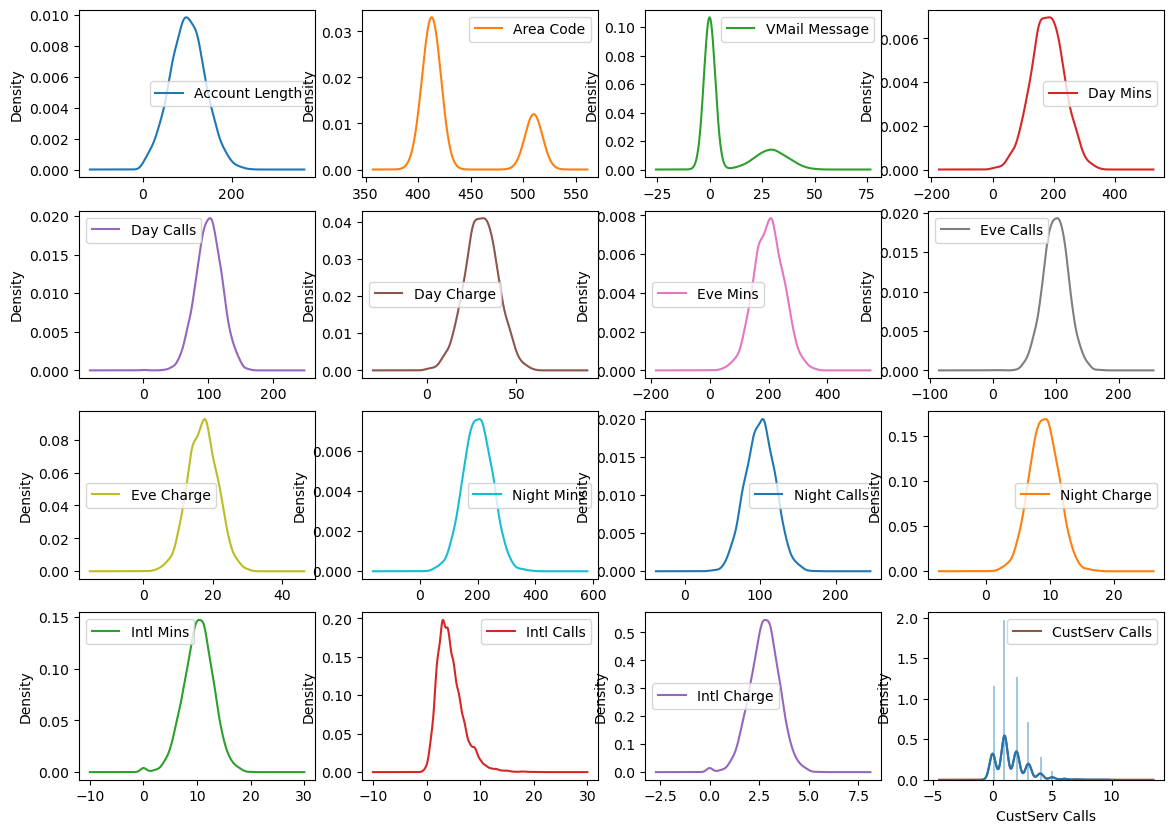

In [18]:
# Density Plots
churn.plot(figsize=(14,10), kind='density', subplots=True, layout=(4,4), sharex=False)
sns.distplot(churn["CustServ Calls"])

<AxesSubplot:xlabel='Churn?', ylabel='CustServ Calls'>

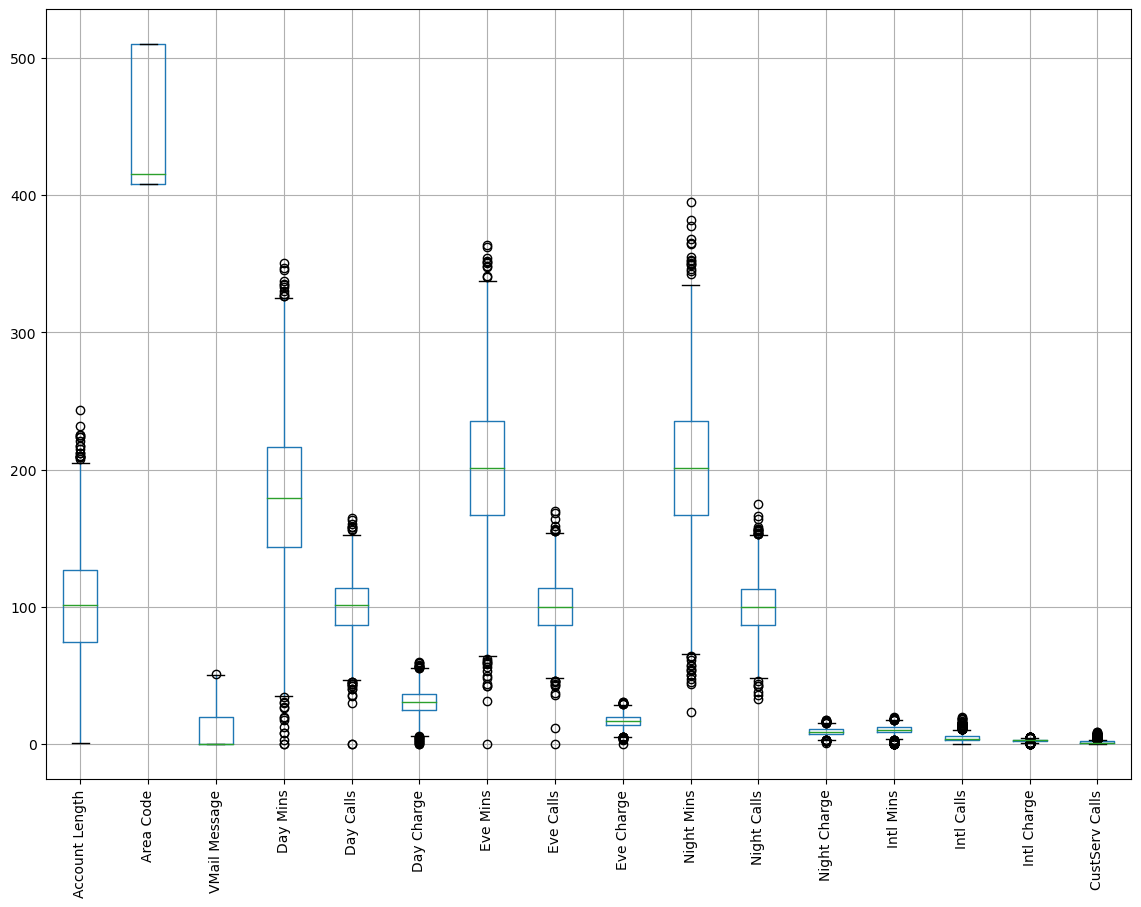

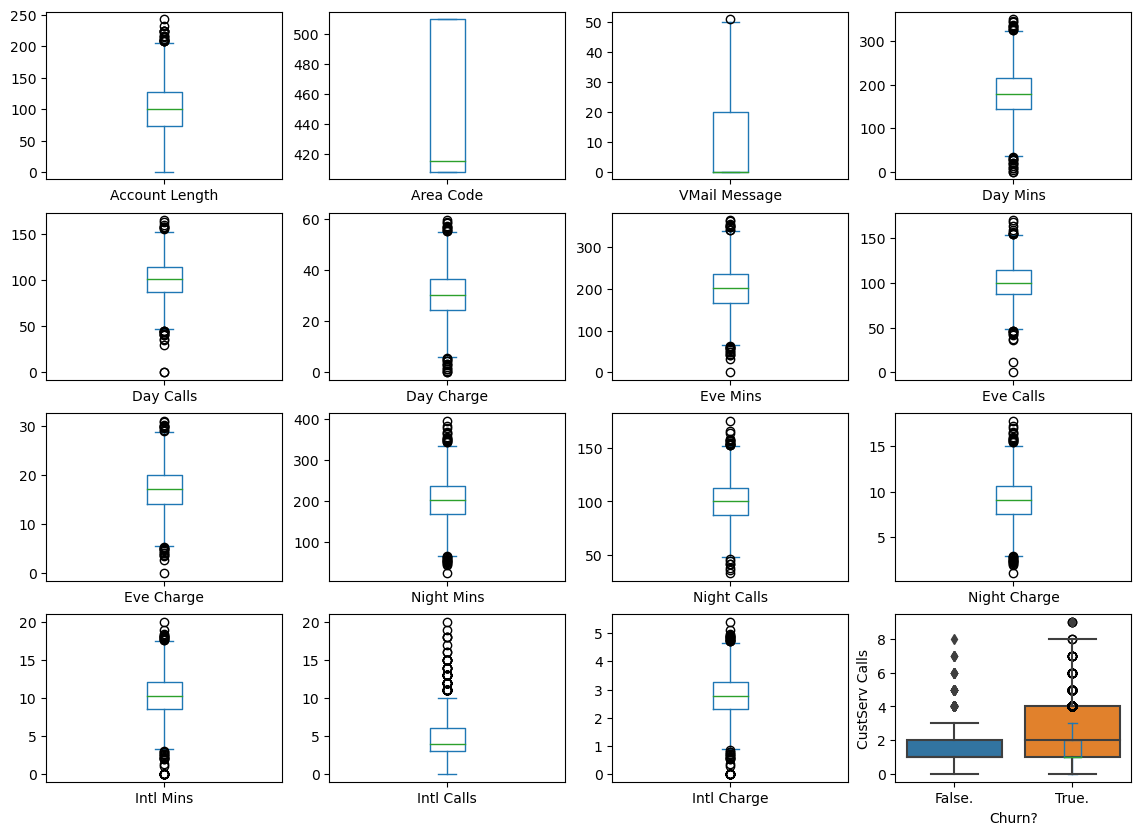

In [19]:
# Box and Whisker Plots 
churn.boxplot(figsize=(14,10))
plt.xticks(rotation=90)
churn.plot(figsize=(14,10), kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
sns.boxplot(x = churn["Churn?"], y = churn["CustServ Calls"], data = churn)

In [20]:
# Separate the variable Customer Service Calls, by the two values of the target
churn_csc_T = churn[churn["Churn?"] == "True."] ["CustServ Calls"]
churn_csc_F = churn[churn["Churn?"] == "False."] ["CustServ Calls"]

Text(0, 0.5, 'Frequency')

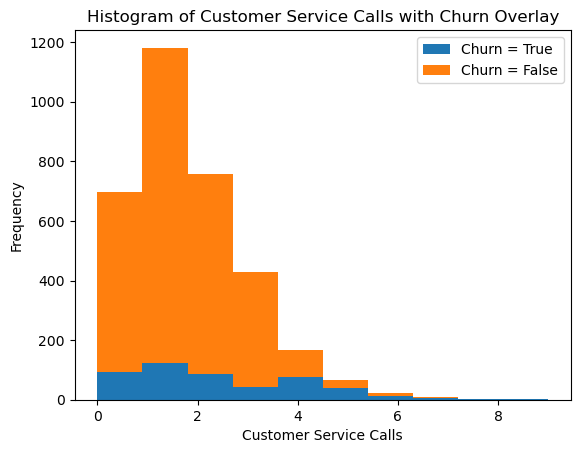

In [21]:
# Create a stacked histogram of the two variables
plt.hist([churn_csc_T, churn_csc_F], bins = 10, stacked = True)
plt.legend(['Churn = True', 'Churn = False'])
plt.title('Histogram of Customer Service Calls with Churn Overlay')
plt.xlabel('Customer Service Calls')
plt.ylabel('Frequency')

([<matplotlib.axis.XTick at 0x7fd782669d60>,
 [Text(0.45, 0, '0'),
  Text(1.35, 0, '1'),
  Text(2.25, 0, '2'),
  Text(3.1500000000000004, 0, '3'),
  Text(4.05, 0, '4'),
  Text(4.95, 0, '5'),
  Text(5.8500000000000005, 0, '6'),
  Text(6.75, 0, '7'),
  Text(7.65, 0, '8'),
  Text(8.549999999999999, 0, '9')])

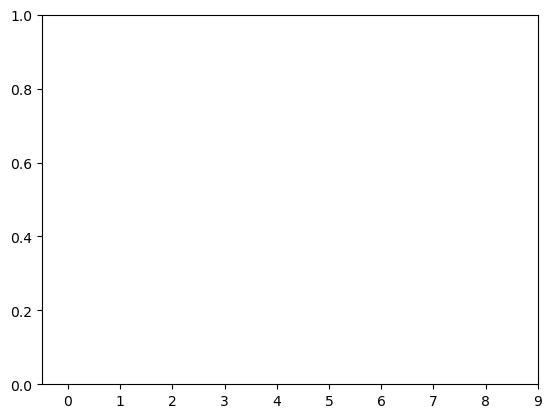

In [22]:
# Labels and positions of the xticks
xlabels = np.arange(10)  # the labels
xpos = [x*0.9+0.45 for x in xlabels]  # the label locations
plt.xticks(xpos, xlabels)

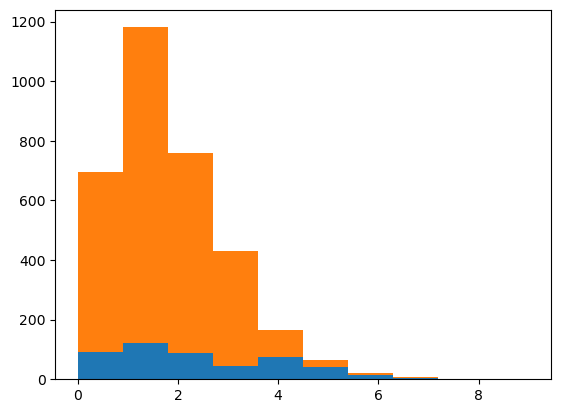

In [23]:
(n, bins, patches) = plt.hist([churn_csc_T, churn_csc_F], bins = 10, stacked = True)

In [24]:
n[1] = n[1] - n[0]
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None]
ourbins = np.column_stack((bins[0:10], bins[1:11]))

<BarContainer object of 10 artists>

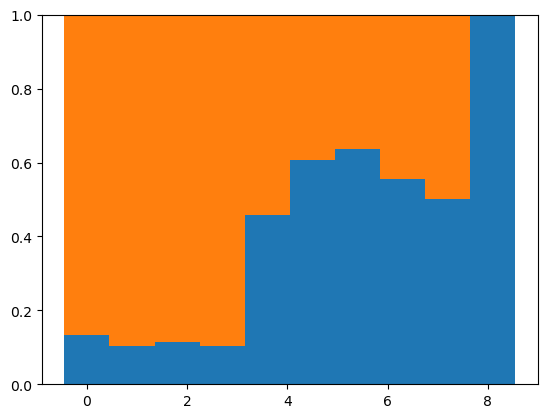

In [25]:
plt.bar(x = ourbins[:,0], height = n_norm[:,0], width = ourbins[:, 1] - ourbins[:, 0])
plt.bar(x = ourbins[:,0], height = n_norm[:,1], width = ourbins[:, 1] - ourbins[:, 0],
bottom = n_norm[:,0])

([<matplotlib.axis.XTick at 0x7fd7834bc3a0>,
 [Text(0.0, 0, '0'),
  Text(0.9000000000000001, 0, '1'),
  Text(1.8, 0, '2'),
  Text(2.7, 0, '3'),
  Text(3.5999999999999996, 0, '4'),
  Text(4.5, 0, '5'),
  Text(5.4, 0, '6'),
  Text(6.3, 0, '7'),
  Text(7.2, 0, '8'),
  Text(8.1, 0, '9')])

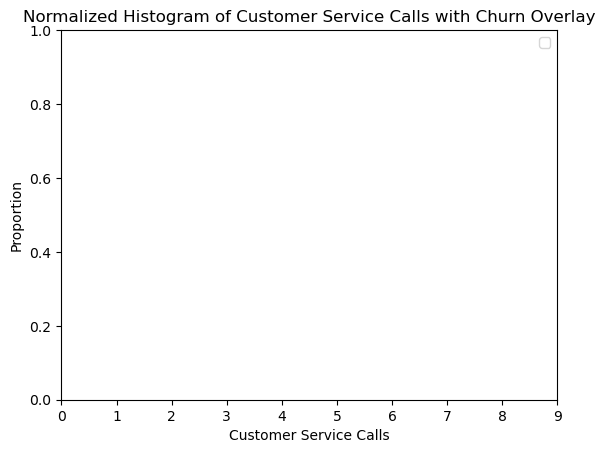

In [26]:
plt.legend(['Churn = True', 'Churn = False'])
plt.title('Normalized Histogram of Customer Service Calls with Churn Overlay')
plt.xlabel('Customer Service Calls')
plt.ylabel('Proportion')
xpos = [x-0.45 for x in xpos]
plt.xticks(xpos, xlabels)

<AxesSubplot:xlabel='Day Mins', ylabel='Eve Mins'>

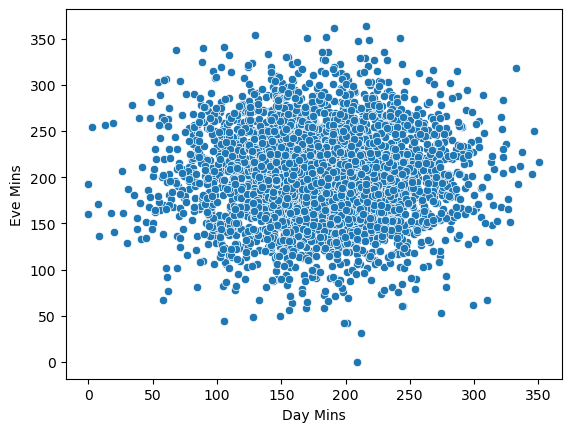

In [27]:
sns.scatterplot(x="Day Mins", y="Eve Mins", data=churn)

<AxesSubplot:xlabel='Day Mins', ylabel='Eve Mins'>

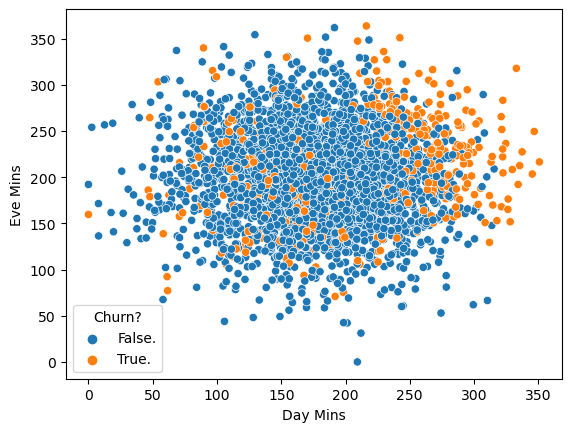

In [28]:
sns.scatterplot(x = "Day Mins", y = "Eve Mins", hue = "Churn?", data = churn)

<AxesSubplot:xlabel='Day Mins', ylabel='CustServ Calls'>

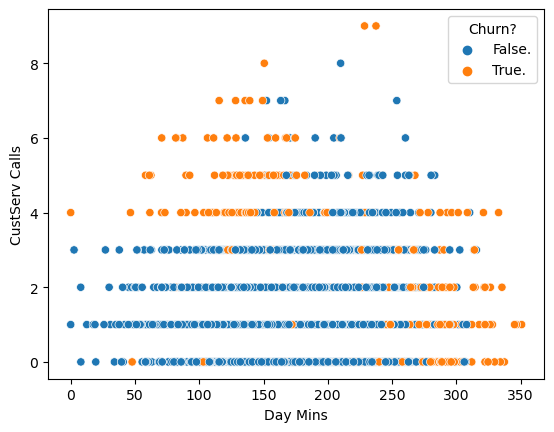

In [29]:
sns.scatterplot(x = "Day Mins", y = "CustServ Calls", hue = "Churn?", data = churn)

In [30]:
churn['Eve Mins binned'] = pd.cut(x = churn['Eve Mins'], bins = [0, 160.01, 240.01, 400], labels=["Low", "Medium", "High"], right = False)

<AxesSubplot:title={'center':'Bar Graph of Evening Minutes (Binned) with Churn Overlay'}, xlabel='Churn?'>

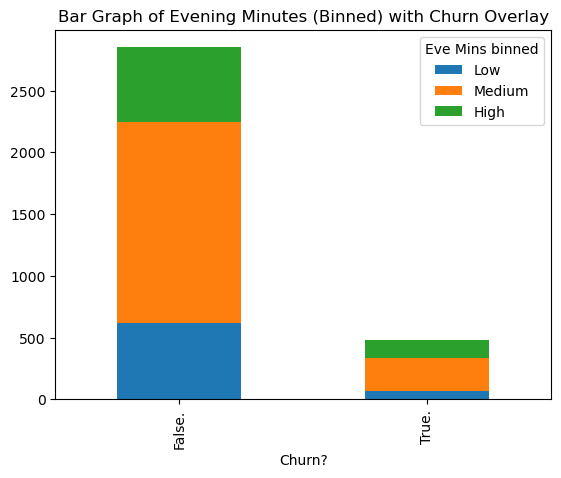

In [31]:
churn_crosstab = pd.crosstab(churn["Churn?"], churn["Eve Mins binned"])
churn_crosstab.plot(kind = 'bar', stacked = True, title = 'Bar Graph of Evening Minutes (Binned) with Churn Overlay')

<AxesSubplot:title={'center':'Bar Graph of Evening Minutes (Binned) with Churn Overlay'}, xlabel='Eve Mins binned'>

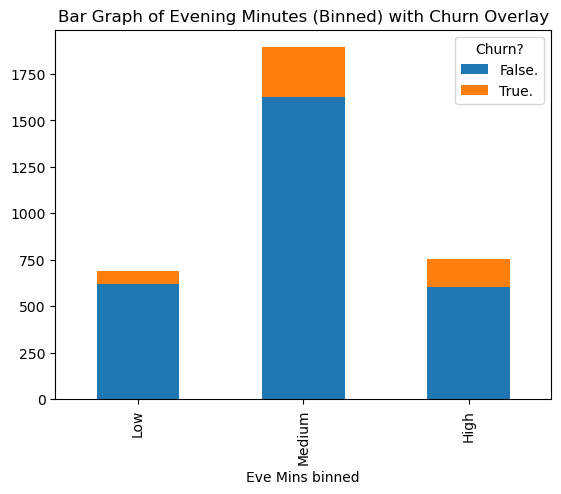

In [32]:
# and pivoted:
churn_crosstab = pd.crosstab(churn["Eve Mins binned"], churn["Churn?"])
churn_crosstab.plot(kind = 'bar', stacked = True, title = 'Bar Graph of Evening Minutes (Binned) with Churn Overlay')

                Account Length  Area Code  VMail Message  Day Mins  Day Calls  \
Account Length        1.000000  -0.012463      -0.004628  0.006216   0.038470   
Area Code            -0.012463   1.000000      -0.001994 -0.008264  -0.009646   
VMail Message        -0.004628  -0.001994       1.000000  0.000778  -0.009548   
Day Mins              0.006216  -0.008264       0.000778  1.000000   0.006750   
Day Calls             0.038470  -0.009646      -0.009548  0.006750   1.000000   
Day Charge            0.006214  -0.008264       0.000776  1.000000   0.006753   
Eve Mins             -0.006757   0.003580       0.017562  0.007043  -0.021451   
Eve Calls             0.019260  -0.011886      -0.005864  0.015769   0.006462   
Eve Charge           -0.006745   0.003607       0.017578  0.007029  -0.021449   
Night Mins           -0.008955  -0.005825       0.007681  0.004323   0.022938   
Night Calls          -0.013176   0.016522       0.007123  0.022972  -0.019557   
Night Charge         -0.0089

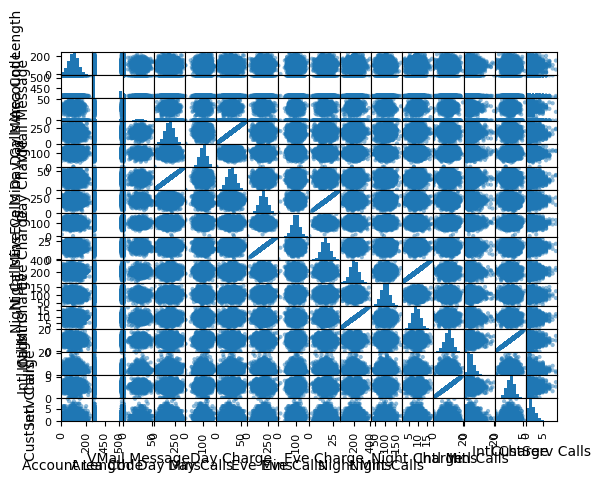

In [33]:
from pandas.plotting import scatter_matrix
scatter_matrix(churn)

# correlation matrix
correlations = churn.corr()
print(correlations)

[Text(0, 0, 'Account Length'),
 Text(0, 1, 'Area Code'),
 Text(0, 2, 'VMail Message'),
 Text(0, 3, 'Day Mins'),
 Text(0, 4, 'Day Calls'),
 Text(0, 5, 'Day Charge'),
 Text(0, 6, 'Eve Mins'),
 Text(0, 7, 'Eve Calls'),
 Text(0, 8, 'Eve Charge'),
 Text(0, 9, 'Night Mins'),
 Text(0, 10, 'Night Calls'),
 Text(0, 11, 'Night Charge'),
 Text(0, 12, 'Intl Mins'),
 Text(0, 13, 'Intl Calls'),
 Text(0, 14, 'Intl Charge'),
 Text(0, 15, 'CustServ Calls')]

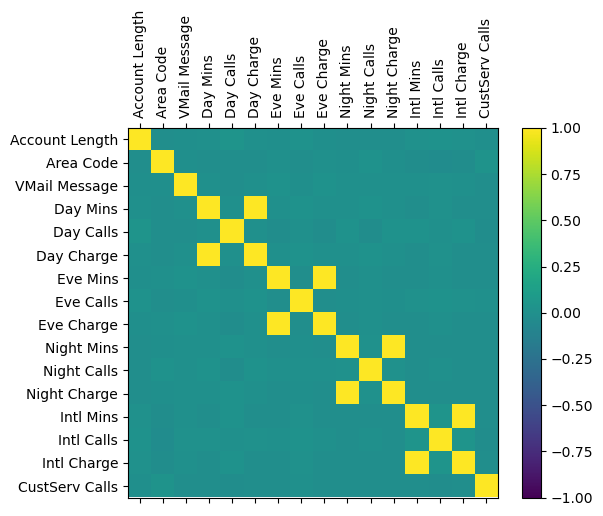

In [34]:
# plot correlation matrix (generic)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

# change the tick labels
ticks = range(0,16,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
numeric_columns = churn.select_dtypes(include='number')
ax.set_xticklabels(numeric_columns, rotation=90)
ax.set_yticklabels(numeric_columns)